<h1 align="center">DEEP LEARNING A GYAKORLATBAN PYTHON ÉS LUA ALAPON - 1. Kis HF</h1>
<h3 align="center">Nagy Péter munkája</h3>

<h2>Képes feladatcsoport</h2>
<br/>
<b>A szükséges lib-ek importja:</b>

In [7]:
%matplotlib inline
from scipy import misc
import matplotlib.pyplot as plt
import wave
import numpy as np
import sklearn.preprocessing as pp
ss = pp.StandardScaler()

<b>Követketző lépésként definiálom a szükséges változókat, konstansokat, beolvasom a képeket egy tömbbe, majd létrehozok 3 db 32*32-es tömbök tömbjét.</b>


In [8]:
pixels = 32 * 32
array = ['chrome.png', 'facebook.png', 'google.png', 'pinterest.png', 'twitter.png']
pics = []

for x in array:
    pics.append(misc.imread(x, mode='RGB'))

r_arr = [[] for x in np.zeros(32*32)]
g_arr = [[] for x in np.zeros(32*32)]
b_arr = [[] for x in np.zeros(32*32)]


<b> Továbbhaladva előállítom a képek RGB csatornáit tartalmazó tömböket:<b/>


In [9]:
for i in range(len(pics)):
    idx = 0
    for j in pics[i]:
        for k in j:
            r_arr[idx].append(k[0])
            g_arr[idx].append(k[1])
            b_arr[idx].append(k[2])
            idx += 1

<b>A tensorok tartalmának megjelenítése:</b>

In [11]:
print('R:')
print(np.array(r_arr))
print()
print('G:')
print(np.array(g_arr))
print()
print('B:')
print(np.array(b_arr))

R:
[[ 0 59  0  0 98]
 [ 0 59  0  0 97]
 [ 0 59  0  0 97]
 ..., 
 [ 0 59  0  0 97]
 [ 0 59  0  0 97]
 [ 0 59  0  0 98]]

G:
[[  0  87   0   0 170]
 [  0  87   0   0 170]
 [  0  87   0   0 170]
 ..., 
 [  0  87   0   0 169]
 [  0  87   0   0 170]
 [  0  87   0   0 170]]

B:
[[  0 157   0   0 219]
 [  0 157   0   0 219]
 [  0 157   0   0 219]
 ..., 
 [  0 157   0   0 218]
 [  0 157   0   0 219]
 [  0 157   0   0 219]]


<b>Következő lépésként csatornánként kiszámítom a pixelek átlagát és szórását:</b>

In [12]:
r_arr_avg = np.array([np.average(x) for x in r_arr]).reshape(32,32)
g_arr_avg = np.array([np.average(x) for x in g_arr]).reshape(32,32)
b_arr_avg = np.array([np.average(x) for x in b_arr]).reshape(32,32)

r_arr_var = np.array([np.var(x) for x in r_arr]).reshape(32,32)
g_arr_var = np.array([np.var(x) for x in g_arr]).reshape(32,32)
b_arr_var = np.array([np.var(x) for x in b_arr]).reshape(32,32)

<b>A StandardScaler segítségével előállítom a 0 várható értékű 1 szórású adathalmazokat, majd ki is írom őket:</b>

In [13]:
print()
print("Piros átlagból előállított adathalmaz:")
r_arr_avg_final = ss.fit_transform(X=r_arr_avg)
print(r_arr_avg_final)
print()
print("Zöld átlagból előállított adathalmaz:")
g_arr_avg_final = ss.fit_transform(X=g_arr_avg)
print(g_arr_avg_final)
print()
print("Kék átlagból előállított adathalmaz:")
b_arr_avg_final = ss.fit_transform(X=b_arr_avg)
print(b_arr_avg_final)

print()
print("Piros szórásból előállított adathalmaz:")
r_arr_v_final = ss.fit_transform(X=r_arr_var)
print(r_arr_v_final)
print()
print("Zöld szórásból előállított adathalmaz:")
g_arr_v_final = ss.fit_transform(X=g_arr_var)
print(g_arr_v_final)
print()
print("Kék szórásból előállított adathalmaz:")
b_arr_v_final = ss.fit_transform(X=b_arr_var)
print(b_arr_v_final)


Piros átlagból előállított adathalmaz:
[[-0.89946307 -1.07176563 -1.30965709 ..., -1.58978861 -1.27404497
  -1.06713864]
 [-0.89946307 -1.07176563 -1.30965709 ..., -1.58978861 -1.27404497
  -1.07177208]
 [-0.89946307 -1.07176563 -1.30965709 ..., -1.58978861 -1.27005891
  -1.07177208]
 ..., 
 [-0.89946307 -1.07176563 -1.30544471 ..., -1.58527857 -1.27404497
  -1.07177208]
 [-0.90541978 -1.07176563 -1.30965709 ..., -1.58978861 -1.27404497
  -1.07177208]
 [-0.90541978 -1.07176563 -1.30965709 ..., -1.58978861 -1.27404497
  -1.06713864]]

Zöld átlagból előállított adathalmaz:
[[-1.02358249 -1.23299116 -1.48372618 ..., -1.28748846 -1.11150585
  -0.96933595]
 [-1.02358249 -1.23299116 -1.48372618 ..., -1.28261392 -1.11150585
  -0.96933595]
 [-1.02358249 -1.23664786 -1.48372618 ..., -1.28261392 -1.11150585
  -0.96933595]
 ..., 
 [-1.02358249 -1.23299116 -1.48372618 ..., -1.28261392 -1.11150585
  -0.96933595]
 [-1.02807312 -1.23299116 -1.48372618 ..., -1.28261392 -1.11150585
  -0.96933595]
 [-1

<h2>Audiós feladatcsoport</h2>

<b>Internetről letöltött wav file megnyitása, majd feldolgozható jellé alakítása:</b>

In [15]:
waveFile = wave.open('cartoon.wav', 'r')
signal = waveFile.readframes(-1)
signal = np.fromstring(signal,'Int16')

<b>Az wav file spektogramjának plotolása:</b>

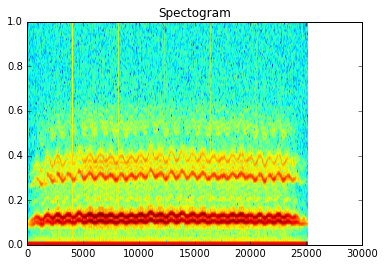

In [17]:
plt.figure(1)
plt.title('Spectogram')
plt.specgram(signal)
plt.show()

<h2>Angolszavas/Hisztogram-os feladatcsoport</h2>

<b>Egy változóba helyezem az angol abc betűit, majd tárolom őket egy Dictionary-ben, egyenként 0 értékkel. Végigmegyek a szöveg karakterein, és ha az adott karakter az angol abc egy betűje, akkor növelem az Dicitonaryben hozzátartozó értéket:</b>

In [18]:
ascii_letters = 'abcdefghijklmnopqrstuvwxyz'
dict = {}
for x in ascii_letters:
    dict[x] = 0

with open('text.txt') as f:
    while True:
        c = f.read(1)
        if c.lower() in ascii_letters:
            if not c:
                break
            else:
                dict[c.lower()] += 1


<b>Plotolom a Dicitonary tartalmát (a szövegben előforduló betűk előfordulásának gyakoriságát) hisztogramon:</b>

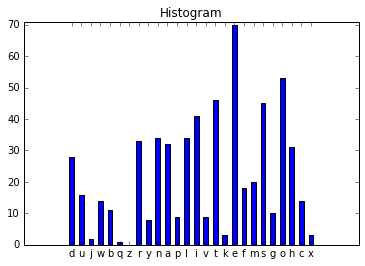

In [19]:
plt.figure(2)
plt.title('Histogram')
plt.bar(np.arange(len(dict)), dict.values(),  align="center", width=0.5)
plt.xticks(np.arange(len(dict)), dict.keys())
y = max(dict.values()) + 1
plt.ylim(0, y)
plt.show()